## LM TECH HUB DATA SCIENCE CAPSTONE PROJECT 2

**BY `THEOPHILUS AJEVWARUE`**

### Problem Definition:

Develop a model that uses various house features to predict the house price. 

### Proposed Steps to Take
- Load the dataset
- Check and deal with column datatypes
- Check and deal with duplicates if any
- Check and deal with missing values if any
- Explore the data
- Initial feature selection using correlation analysis and variance threshold
- Encode the data if there's any categorical column
- Scale the data
- Split the data into train, validation and test splits
- Build and evaluate initial models
- Further feature selection
- Hyperparameters tuning
- Evaluate final model
- Saving model

**Columns Information:**

1. **id**:  A unique identifier for each home
2. **date**: The date when the house was sold.
3. **price**: The sale price of the house.
4. **bedrooms**: The number of bedrooms in the house.
5. **bathrooms**: The number of bathrooms in the house (often includes partial bathrooms).
6. **sqft_living**: The interior living space area in square feet.
7. **sqft_lot**: The total area of the lot in square feet.
8. **floors**: The number of floors (levels) in the house.
9. **waterfront**: Indicates whether the house has a waterfront view (binary: 0 for no, 1 for yes).
10. **view**: A rating of the quality of the view from the house.
11. **condition**: The overall condition of the house.
12. **grade**: The quality of construction and design.
13. **sqft_above**: The square footage of the house above ground level.
14. **sqft_basement**: The square footage of the basement.
15. **yr_built**: The year the house was built.
16. **yr_renovated**: The year the house was last renovated (0 if never renovated).
17. **zipcode**: The postal code of the house's location.
18. **lat**: The latitude coordinate of the house.
19. **long**: The longitude coordinate of the house.
20. **sqft_living15**: The average living space area of the 15 nearest neighbors in square feet.
21. **sqft_lot15**: The average lot size of the 15 nearest neighbors in square feet.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import optuna
import sklearn
import pickle

In [2]:
# Importing the dataset
houses = pd.read_csv("kc_house_data.csv")

# Displaying first five rows
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Enabling maximum columns
pd.set_option("display.max_columns", None)

# Displaying first five rows
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Cleaning and Manipulation

In [4]:
# Making a copy of the dataset for future reference
data = houses.copy()

# Displaying first two rows of the copied data 
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [5]:
# Checking the dimensions of the data
data.shape

(21613, 21)

***The data contains 21,613 rows and 21 columns.***

In [6]:
# Checking the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

From the above we observe the following:
- Date column is of object datatype
- There are missing values in sqft_above column

In [7]:
# Checking for duplicates
data.duplicated().sum()

0

***There are no duplicates in the data***

In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Checking for missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are two missing values in sqft_above. 

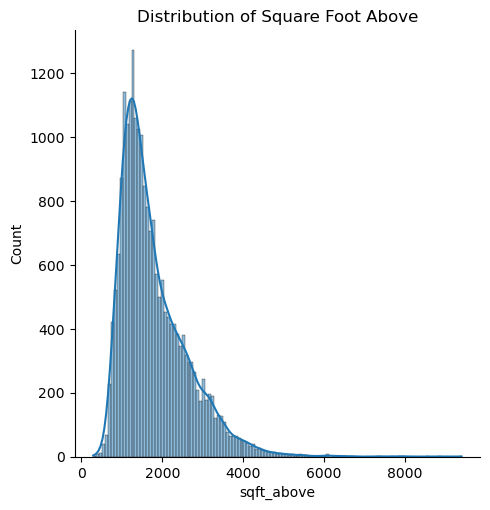

In [10]:
# Checking the distribution of the sqft_above column
sns.displot(data["sqft_above"], kde = True)
plt.title("Distribution of Square Foot Above");

The column is right skewed. This means there are few large values that can significantly affect the mean. As such we'll fill the missing values using the median of the columns.

In [11]:
# Dealing with the missing values
data["sqft_above"] = data["sqft_above"].fillna(data["sqft_above"].median())

# Checking for missing values in sqft_above
data["sqft_above"].isnull().any()

False

***Missing values have been successfully dealt with***

#### Exploring Id column

In [12]:
# Checking the count of unique values
data["id"].unique().size, data.shape[0]

(21436, 21613)

There are id occuring more than once.

In [13]:
# Checking Id occuring more than once
id_value_count = data["id"].value_counts()
data[data['id'].isin(id_value_count[id_value_count > 1].index)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290.0,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290.0,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690.0,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690.0,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960.0,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680.0,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200.0,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200.0,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780.0,0,2013,0,98065,47.5184,-121.886,2850,6000


From the above we see an interesting observation. Same (id) houses were sold at different times. And the time it was sold also affected the price. 

But since the id column is just a unique identifier we'll drop the column

In [14]:
# Dropping id column
data.drop("id", axis = 1, inplace = True)

# Checking the first two rows
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639


***The id column has been successfully dropped.***

In [15]:
# Exploring the date column
data["date"].unique()[:15]

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000'],
      dtype=object)

In [16]:
# Extracting only date and excluding values after T
data["date"] = data["date"].str.extract(r"([\d]+)T")

# Converting to datetime
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")

# Checking the first five rows of the data column
data["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [17]:
# Checking the earliest date
data["date"].min(), data["date"].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In our column, May 2nd, 2014 is our earliest date. Since we can use the dates literally, we'll calculate the number days from a reference date when the house was sold. 

We'll use the turn of the year 2010 as the reference date (2010-01-01). 

In [18]:
# Stating the reference date
reference_date = pd.to_datetime("2010-01-01", format = "%Y-%m-%d")

# Creating the reference date column
data["days_since_2010"] = (data["date"] - reference_date).dt.days

# Checking first five values of the data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,1746
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,1803
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,1881
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,1803
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,1874


In [19]:
# Dropping the date column
data.drop("date", axis = 1, inplace = True)

# Displaying first two values
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,1746
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,1803


In [20]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'days_since_2010'],
      dtype='object')

#### Exploring yr_built

In [21]:
# Checking the unique values
data["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

The values above represent the year in which a specific house is built. From this information we can actually extract the age of the house if the year built is subtracted from the current year which is 2024. 

In [22]:
# Extracting age of the house
data["house_age"] = 2024 - data["yr_built"]

# Displaying five random values
data.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010,house_age
17724,475000.0,3,1.75,1340,2805,1.5,0,0,3,7,1340.0,0,1919,0,98144,47.5922,-122.297,1650,2805,1944,105
15310,622500.0,3,2.50,2260,4550,1.5,0,0,4,7,1380.0,880,1928,0,98126,47.5714,-122.376,1870,4582,1699,96
5784,739375.0,5,3.00,2640,3200,2.0,0,0,4,7,2140.0,500,1906,0,98112,47.6188,-122.308,1540,2242,1659,118
11401,920000.0,3,1.75,2480,4000,1.0,0,0,3,8,1240.0,1240,1948,2014,98122,47.6150,-122.288,2450,4000,1747,76
2635,257500.0,3,1.75,1530,14087,1.0,0,0,3,7,1070.0,460,1979,0,98042,47.3146,-122.043,1770,13660,1726,45


In [23]:
# Dropping the yr_built column
data.drop("yr_built", axis = True, inplace = True)

# Displaying first two rows
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,0,98178,47.5112,-122.257,1340,5650,1746,69
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1991,98125,47.7210,-122.319,1690,7639,1803,73


 #### Exploring yr_renovated

In [24]:
# Exploring the unique values
data["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

We observe that there are zero values. This means that no renovation has been done on the on home. 
We'll engineer a new column from this data called renovated having two values:
- 0 if the house is not renovated
- 1 if the house is renovated

In [25]:
# Extracting new category to state whether or not a house has been renovated
data["house_renovated"] = data["yr_renovated"].apply(lambda x: 0 if x == 0 else 1)

# Displaying five random values
data.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010,house_age,house_renovated
21296,445000.0,3,2.50,2380,5269,2.0,0,0,3,8,2380.0,0,0,98056,47.5066,-122.192,2150,7600,1883,16,0
3120,350000.0,3,1.50,1320,4400,1.0,0,0,3,6,1320.0,0,0,98112,47.6231,-122.292,1350,4400,1683,115,0
6696,385000.0,4,2.75,2960,10454,1.0,0,1,3,8,2360.0,600,0,98198,47.4006,-122.322,1870,10500,1796,45,0
6483,525000.0,4,1.75,1710,10440,1.0,0,0,4,7,1710.0,0,0,98006,47.5756,-122.158,1480,10440,1650,69,0
8050,499000.0,4,2.25,2440,5000,2.0,0,0,3,7,2440.0,0,0,98065,47.5407,-121.890,2440,5212,1950,17,0


In [26]:
# Dropping the yr_renovated column
data.drop("yr_renovated", axis = 1, inplace = True)

# Displaying first two items
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010,house_age,house_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,98178,47.5112,-122.257,1340,5650,1746,69,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,98125,47.7210,-122.319,1690,7639,1803,73,1


#### Exploring the zipcode column

In [27]:
# Checking the unique values
data["zipcode"].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

From the above we see that the zipcodes are all starting with either 980 or 981 and these represents areas in Seattle, Washington.

The zip codes represents geographical location and thus are categorical. 

In [28]:
# Converting zipcode from integer to string
data["zipcode"] = data["zipcode"].astype("str")

# Displaying zipcode datatype
data["zipcode"].dtype

dtype('O')

#### Exploring lat and long Columns

In [29]:
# Calculating the geographical mean
long_mean = data["long"].mean()
lat_mean = data["lat"].mean()
geographical_mean = (lat_mean, long_mean)

# Displaying geographical mean
geographical_mean

(47.56005251931708, -122.21389640494147)

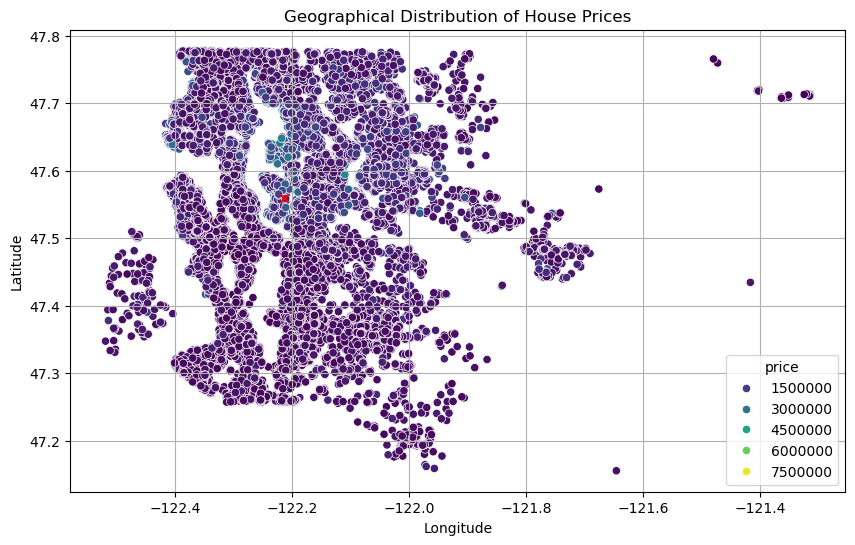

In [30]:
# Visualizing the lat and long on a scatterplot
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "long", y = "lat", data = data, hue = "price", palette="viridis")
plt.scatter(long_mean, lat_mean, color = "red", marker = "x")
plt.title("Geographical Distribution of House Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid();

From the plot above, it's not so obvious as to whether the location of the house affects the house price. 

Instead of keeping the latitude and longitudes, we can calculate the distance from the geographical mean.

In [31]:
# Importing geodesic from geopy
from geopy.distance import geodesic

# Function to calculate distance from centre in km
def calculate_distance(row, target_location):
    return geodesic((row["lat"], row["long"]), target_location).km


# Applying the function to the data
data["distance_from_centre"] = data.apply(calculate_distance, axis = 1, target_location = geographical_mean)

# Displaying first five random samples
data.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,days_since_2010,house_age,house_renovated,distance_from_centre
6841,641000.0,5,2.75,3710,8674,2.0,0,0,3,9,3710.0,0,98056,47.5140,-122.176,3250,8678,1921,28,0,5.861504
2624,677100.0,3,2.00,2110,9199,1.0,0,0,3,10,2110.0,0,98074,47.6496,-122.083,3130,8841,1868,31,0,14.000007
10182,357000.0,3,1.75,1250,17493,1.0,0,0,3,7,1250.0,0,98155,47.7613,-122.274,2180,19553,1746,52,0,22.826341
20752,298900.0,3,2.50,1852,4000,2.0,0,0,3,7,1852.0,0,98002,47.3451,-122.209,2475,4000,1748,10,0,23.901201
19906,622000.0,3,3.50,1690,1765,2.0,0,0,3,8,1370.0,320,98103,47.6536,-122.340,1690,1694,1748,18,0,14.074174


In [32]:
# Dropping the longitudes and latitudes columns
data.drop(["lat", "long"], axis = 1, inplace = True)

# Displaying first two values
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,days_since_2010,house_age,house_renovated,distance_from_centre
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,98178,1340,5650,1746,69,0,6.327206
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,98125,1690,7639,1803,73,1,19.559992


### Descriptive Statistics

In [33]:
# Basic statistics of numerical variables
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,days_since_2010,house_age,house_renovated,distance_from_centre
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.374960,291.509045,1986.552492,12768.455652,1762.193078,52.994864,0.042289,16.935162
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.092757,442.575043,685.391304,27304.179631,113.048011,29.373411,0.201253,7.928621
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,1582.000000,9.000000,0.000000,0.171296
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,1663.000000,27.000000,0.000000,11.568352
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,1749.000000,49.000000,0.000000,16.264167
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,1873.000000,73.000000,0.000000,21.982696
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,1972.000000,124.000000,1.000000,69.657413


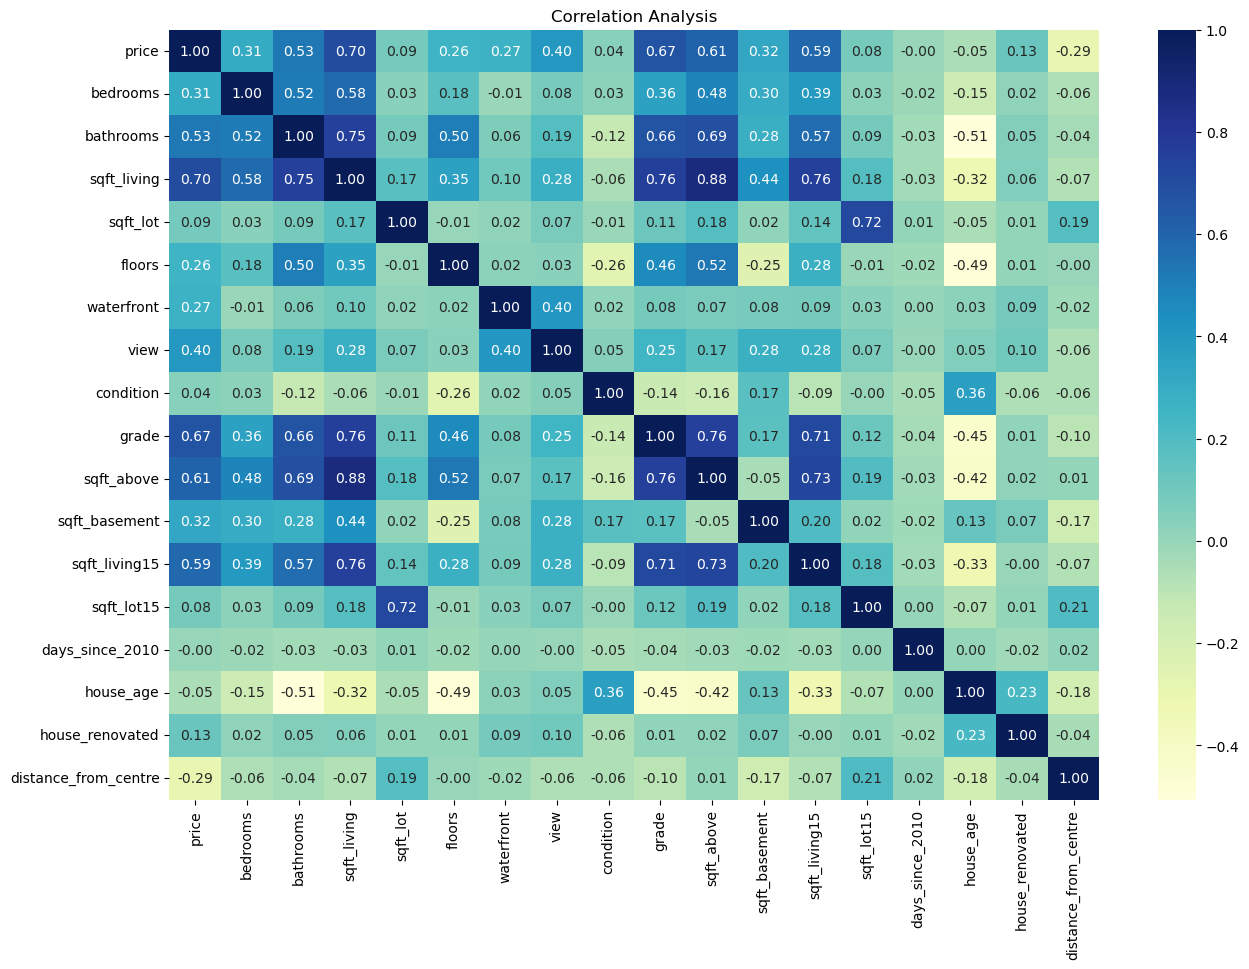

In [34]:
# Correlation analysis
corr_matrix = data.select_dtypes(include=["int32", "int64", "float64"]).corr()

# Visualizing the correlation matrix
plt.figure(figsize = (15, 10))

sns.heatmap(corr_matrix, 
            annot=True,
            fmt=".2f",
            cmap="YlGnBu")
plt.title("Correlation Analysis");

There's likely a case of Multicolinearity especially regarding sqft_living and sqft_above. We'll check their VIF scores to confirm this

In [35]:
# Importing variance inflation factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = data.select_dtypes(include=["int32", "int64", "float64"])

# Calculating the VIF for each feature
vif = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Printing VIF scores
for i, (feature, vif_score) in enumerate(zip(features.columns, vif)):
    print(f"{feature}: VIF = {vif_score:.2f}")

price: VIF = 9.48
bedrooms: VIF = 23.32
bathrooms: VIF = 28.69
sqft_living: VIF = 1220842.33
sqft_lot: VIF = 2.38
floors: VIF = 16.47
waterfront: VIF = 1.27
view: VIF = 1.56
condition: VIF = 32.25
grade: VIF = 121.85
sqft_above: VIF = 917384.97
sqft_basement: VIF = 66348.31
sqft_living15: VIF = 26.57
sqft_lot15: VIF = 2.61
days_since_2010: VIF = 97.20
house_age: VIF = 8.91
house_renovated: VIF = 1.20
distance_from_centre: VIF = 6.90


The VIF scores obtained validates our observation regarding the sqft_living and sqft_above column being highly correlated with most of the features. But since in reality, these features are vital they won't be dropped. 

### Dealing with low variance features

In [36]:
# Importing Variance Threshold
from sklearn.feature_selection import VarianceThreshold

# Creating an object of the VarianceThreshold
selector = VarianceThreshold(threshold=0.1)

# Features to check
df_var = data.select_dtypes(include=["int32", "int64", "float64"])

# Fitting selector to data
df_selected = selector.fit_transform(df_var)

In [37]:
# Extracting index of features kept
kept_features = selector.get_support(indices=True)

# Extracting selected feature names
selected_features = df_var[df_var.columns[kept_features]].columns
selected_features

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'days_since_2010', 'house_age',
       'distance_from_centre'],
      dtype='object')

In [38]:
# Comparing number of columns
df_var.shape[1], len(selected_features)

(18, 16)

From the above we see that two columns were dropped from the original columns. 

In [39]:
# Examining the columns dropped
for column in df_var.columns:
    if column not in selected_features:
        print (column)

waterfront
house_renovated


The columns dropped were waterfront and house_renovated. 

In [40]:
# Examining the distribution of waterfront
data["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [41]:
# Examining the distribution of house_renovated
data["house_renovated"].value_counts()

house_renovated
0    20699
1      914
Name: count, dtype: int64

From the above we see that the distribution of the categories are very imbalanced. As such we these two columns

In [42]:
# Dropping waterfront and house_renovated from data
data.drop(["waterfront", "house_renovated"], axis = True, inplace = True)

# Displaying first two items 
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,days_since_2010,house_age,distance_from_centre
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,98178,1340,5650,1746,69,6.327206
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,98125,1690,7639,1803,73,19.559992


### Data Preprocessing

#### Encoding

In [43]:
# Checking total number of unique values in zipcode
len(data["zipcode"].unique())

70

The zipcode although expressed as number is actually categorical as they represent the location of a place. We'll won't use onehot encoder as that will create 70 new columns. As such binary encoder will use which will create 7 new columns. 

In [44]:
# Splitting data into features and label
X = data.drop("price", axis = 1)  # Features
y = data["price"]

# Checking the shapes of the features and label
X.shape, y.shape

((21613, 16), (21613,))

In [45]:
# Importing binary encoder
from category_encoders import BinaryEncoder

# Creating an object of the binary encoder
binary_encoder = BinaryEncoder(cols=["zipcode"])

# Fitting encoder to the matrix of features
binary_encoder.fit(X)

# Transforming the features
X_encoded = binary_encoder.transform(X)

# Displaying first five values
X_encoded.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,sqft_living15,sqft_lot15,days_since_2010,house_age,distance_from_centre
0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,0,0,0,0,0,0,1,1340,5650,1746,69,6.327206
1,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,0,0,0,0,0,1,0,1690,7639,1803,73,19.559992
2,2,1.00,770,10000,1.0,0,3,6,770.0,0,0,0,0,0,0,1,1,2720,8062,1881,91,19.825723
3,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,0,0,0,0,1,0,0,1360,5000,1803,59,14.172592
4,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,0,0,0,0,1,0,1,1800,7503,1874,37,14.184351


In [46]:
X_encoded.shape

(21613, 22)

#### Scaling of features

In [47]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Creating an object of the scaler
scaler = StandardScaler()

# Fitting the scaler to the data
scaler.fit(X_encoded)

# Tranforming the data
X_scaled = pd.DataFrame(scaler.transform(X_encoded), columns= X_encoded.columns)

# Displaying first five rows of the scaled data
X_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,sqft_living15,sqft_lot15,days_since_2010,house_age,distance_from_centre
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.305759,-0.629187,-0.558836,-0.734687,-0.658681,-0.269158,-0.841907,-0.939852,-1.033935,-0.982706,-0.992762,1.038447,-0.943355,-0.260715,-0.143244,0.544898,-1.337963
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.305759,-0.629187,-0.558836,0.460859,0.245141,-0.269158,-0.841907,-0.939852,-1.033935,-0.982706,1.007291,-0.962976,-0.432686,-0.187868,0.360978,0.681079,0.331065
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.305759,-0.629187,-1.409587,-1.229812,-0.658681,-0.269158,-0.841907,-0.939852,-1.033935,-0.982706,1.007291,1.038447,1.070140,-0.172375,1.050966,1.293892,0.364581
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.305759,2.444294,-0.558836,-0.891678,1.397515,-0.269158,-0.841907,-0.939852,-1.033935,1.017598,-0.992762,-0.962976,-0.914174,-0.284522,0.360978,0.204446,-0.348438
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.305759,-0.629187,0.291916,-0.130876,-0.658681,-0.269158,-0.841907,-0.939852,-1.033935,1.017598,-0.992762,1.038447,-0.272190,-0.192849,0.989044,-0.544548,-0.346955


#### Splitting data into train, validation and test set

In [48]:
# Importing train, validation and test split
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_scaled, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_validation, y_validation, test_size=0.5, random_state=101)

# Checking shape of splits
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((15129, 22), (3242, 22), (3242, 22), (15129,), (3242,), (3242,))

### Initial Model Development and Evaluation

In [49]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [50]:
# Instantiating the models
np.random.seed(101)
lr = LinearRegression()
svm = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
et = ExtraTreesRegressor()
xgb = XGBRegressor(objective="reg:squarederror")
cat = CatBoostRegressor(learning_rate=0.1, verbose=False)
mlp = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=101)

#### Model training and evaluation

In [90]:
np.random.seed(101)

# Creating a dictionary of the models
models = {
    "Linear Regression":lr,
    "SVM":svm,
    "KNN":knn,
    "Decision Tree":dt,
    "Random Forest":rf,
    "Gradient Boost":gb,
    "Extra Trees":et,
    "XG Boost":xgb,
    "Cat Boost":cat,
    "Neural Networks":mlp
}

# Creating an empty dictionary to hold evaluation scores
scores = {name:{} for name in models.keys()}

# For loop to train and evaluate models
for name, model in models.items():
    # Fitting model on train split
    model.fit(X_train, y_train)
    
    # Getting predictions on validation split
    y_pred = model.predict(X_val)
    
    # Getting evaluation performace scores
    r2_train = model.score(X_train, y_train)
    r2_val = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    # Appending scores to scores dictionary
    scores[name]["Train R2"] = r2_train
    scores[name]["Validation R2"] = r2_val
    scores[name]["MAE"] = mae
    scores[name]["MSE"] = mse
    scores[name]["RMSE"] = rmse
    
    
# Converting scores to a dataframe
initial_evaluation = pd.DataFrame(scores)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
initial_evaluation

,Linear Regression,SVM,KNN,Decision Tree,Random Forest,Gradient Boost,Extra Trees,XG Boost,Cat Boost,Neural Networks
Train R2,6.761737e-01,-5.883771e-02,8.701103e-01,1.000000e+00,9.734731e-01,8.515275e-01,1.000000e+00,9.708924e-01,9.681932e-01,5.881952e-01
Validation R2,6.748605e-01,-5.783227e-02,8.165008e-01,6.565354e-01,8.342507e-01,7.980696e-01,8.407582e-01,8.326288e-01,8.696547e-01,5.716796e-01
MAE,1.292312e+05,2.133858e+05,8.076057e+04,1.111050e+05,7.976516e+04,9.887382e+04,7.405170e+04,7.895080e+04,7.076324e+04,1.610467e+05
MSE,3.754318e+10,1.221457e+11,2.118827e+10,3.965914e+10,1.913873e+10,2.331649e+10,1.838732e+10,1.932600e+10,1.505070e+10,4.945726e+10
RMSE,1.937606e+05,3.494935e+05,1.455619e+05,1.991460e+05,1.383428e+05,1.526974e+05,1.355998e+05,1.390180e+05,1.226813e+05,2.223899e+05


From the above, we that KNN, Randomforest, GradientBoost, ExtraTrees, XGBoost and CatBoost are performing quite well. 

We'll use Recursive Feature Elimination for further feature selection.

### Model Improvement

### 1. Further Feature Selection

In [57]:
# Initial Model Performance
np.random.seed(101)

# Initiating and training the model
model_cat = CatBoostRegressor(learning_rate=0.1, verbose = False)
model_cat.fit(X_train, y_train)

# Evaluating model
r2_score_train = model_cat.score(X_train, y_train)
y_pred = model_cat.predict(X_val)
r2 = r2_score(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

# Printing scores
print("r2 on train:", r2_score_train)
print("r2 on test:", r2)
print("rmse:", rmse)
print("mse:", mse)
print("mae:", mae)

r2 on train: 0.968193152407532
r2 on test: 0.869654684967934
rmse: 122681.30455402446
mse: 15050702487.077305
mae: 70763.24229034342


In [58]:
# Importing RFECV and setting random seed
from sklearn.feature_selection import RFECV
np.random.seed(101)

# Instantiating the model
model = CatBoostRegressor(learning_rate=0.1, verbose = False)

# Creating an instance of RFECV
rfe = RFECV(model, cv = 5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fitting RFECV
rfe.fit(X_train, y_train)

# Extracting selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode_0',
       'zipcode_1', 'zipcode_2', 'zipcode_3', 'zipcode_4', 'zipcode_5',
       'zipcode_6', 'sqft_living15', 'sqft_lot15', 'days_since_2010',
       'house_age', 'distance_from_centre'],
      dtype='object')

In [61]:
# Shape of initial featues compared with shape selected features
X_train.shape[1], len(selected_features)

(22, 22)

All the features was deemed important after the recursive feature elimination. We'll perform hyperparameters tuning using optuna to try and improve the models prediction.

### 2.  Combining Models using Stacking Regressor

We'll stack linear regression, catboost, randomforest, knn and mlp using extretrees regressor as the meta learner:

**Base Models**
- Linear Regression
- CatBoost Regressor
- ExtraTrees Regressor
- RandomForest Regressor
- Multi-Layer Perceptron Regressor
 
**Meta Learner**
- Extra Trees Regressor

In [92]:
# Importing Stacking Regressor and setting random seed
from sklearn.ensemble import StackingRegressor
np.random.seed(101)

# Defining initial estimators
estimators = [("Linear regression", lr),
             ("random forest", rf),
             ("knn", knn),
             ("cat boost", cat),
             ("mlp",mlp)]

# Creating an object of the Stacking regressor
stacking = StackingRegressor(estimators=estimators, final_estimator=et, n_jobs=-1, verbose=False)

# Fitting stacking regressor to the data
stacking.fit(X_train, y_train)

StackingRegressor(estimators=[('Linear regression', LinearRegression()),
                              ('random forest', RandomForestRegressor()),
                              ('knn', KNeighborsRegressor()),
                              ('cat boost',
                               <catboost.core.CatBoostRegressor object at 0x00000242120064C0>),
                              ('mlp',
                               MLPRegressor(max_iter=1000, random_state=101))],
                  final_estimator=ExtraTreesRegressor(), n_jobs=-1,
                  verbose=False)

In [117]:
# Making predictions
y_pred = stacking.predict(X_val)

# Displaying Evaluations
print(f"""r2: {stacking.score(X_val, y_val)}
mae: {mean_absolute_error(y_val, y_pred)}
mse: {mean_squared_error(y_val, y_pred)}
rmse: {root_mean_squared_error(y_val, y_pred)}
""")

r2: 0.8741264845061598
mae: 69821.40412708205
mse: 14534353093.04554
rmse: 120558.50485571535



In [118]:
initial_evaluation.loc[:, ["KNN", "Random Forest", "Extra Trees", "Cat Boost", "Neural Networks"]]

,KNN,Random Forest,Extra Trees,Cat Boost,Neural Networks
Train R2,8.701103e-01,9.734731e-01,1.000000e+00,9.681932e-01,5.881952e-01
Validation R2,8.165008e-01,8.342507e-01,8.407582e-01,8.696547e-01,5.716796e-01
MAE,8.076057e+04,7.976516e+04,7.405170e+04,7.076324e+04,1.610467e+05
MSE,2.118827e+10,1.913873e+10,1.838732e+10,1.505070e+10,4.945726e+10
RMSE,1.455619e+05,1.383428e+05,1.355998e+05,1.226813e+05,2.223899e+05


From the result above we see that stacking the models improved the model's prediction compared to the individual models. 

Next we'll tune the hyper parameters of the KNN, Random Forest, Extra Trees and Cat Boost models. 

### 3. Hyperparameters Tuning of Models

#### a. Cat Boost  Regressor

In [63]:
# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the CatBoostRegressor
    param = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'verbose': False}
    
    # Creating and training the CatBoostRegressor model    
    model = CatBoostRegressor(**param)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)
    
    # Predicting on the test set
    preds = model.predict(X_val)
    
    # Calculating the root mean squared error
    rmse = root_mean_squared_error(y_val, preds)
    return rmse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-12 17:22:00,395] A new study created in memory with name: no-name-a3be1498-1595-47ba-845d-dce6c206f9df
[I 2024-09-12 17:22:17,366] Trial 0 finished with value: 132199.7820493814 and parameters: {'iterations': 844, 'learning_rate': 0.2520227424823976, 'depth': 9, 'l2_leaf_reg': 4.680722411299127, 'bagging_temperature': 0.44910975295917954, 'random_strength': 0.47464954003283455, 'border_count': 185}. Best is trial 0 with value: 132199.7820493814.
[I 2024-09-12 17:22:23,790] Trial 1 finished with value: 133853.50352523677 and parameters: {'iterations': 1514, 'learning_rate': 0.2726873496950285, 'depth': 9, 'l2_leaf_reg': 6.979087874100453, 'bagging_temperature': 0.0577372203369817, 'random_strength': 0.7003744141326903, 'border_count': 59}. Best is trial 0 with value: 132199.7820493814.
[I 2024-09-12 17:22:31,055] Trial 2 finished with value: 125168.34195190857 and parameters: {'iterations': 970, 'learning_rate': 0.0743304359583134, 'depth': 5, 'l2_leaf_reg': 0.912922470410805

[I 2024-09-12 17:25:57,029] Trial 24 finished with value: 127331.68100986422 and parameters: {'iterations': 1074, 'learning_rate': 0.1308641628668479, 'depth': 7, 'l2_leaf_reg': 0.07808742720095296, 'bagging_temperature': 0.14571308404165867, 'random_strength': 0.6794317245362989, 'border_count': 206}. Best is trial 19 with value: 123103.46045818778.
[I 2024-09-12 17:26:09,765] Trial 25 finished with value: 125666.63552833257 and parameters: {'iterations': 768, 'learning_rate': 0.05553051630995239, 'depth': 8, 'l2_leaf_reg': 0.7851965193359998, 'bagging_temperature': 0.6141637312748232, 'random_strength': 0.8824852936757825, 'border_count': 186}. Best is trial 19 with value: 123103.46045818778.
[I 2024-09-12 17:26:20,259] Trial 26 finished with value: 128151.73829173249 and parameters: {'iterations': 616, 'learning_rate': 0.05358136916399589, 'depth': 8, 'l2_leaf_reg': 0.9952171636023286, 'bagging_temperature': 0.6300670190917103, 'random_strength': 0.8319593076650074, 'border_count': 

[I 2024-09-12 17:30:29,611] Trial 48 finished with value: 125618.40311252046 and parameters: {'iterations': 1947, 'learning_rate': 0.06967087077413403, 'depth': 6, 'l2_leaf_reg': 4.748668355207787, 'bagging_temperature': 0.2778520555198709, 'random_strength': 0.647138135758948, 'border_count': 104}. Best is trial 19 with value: 123103.46045818778.
[I 2024-09-12 17:30:39,531] Trial 49 finished with value: 129133.21599763194 and parameters: {'iterations': 1792, 'learning_rate': 0.07472245502249182, 'depth': 5, 'l2_leaf_reg': 3.111214088566766, 'bagging_temperature': 0.24826170173533982, 'random_strength': 0.7359194644931573, 'border_count': 80}. Best is trial 19 with value: 123103.46045818778.
[I 2024-09-12 17:30:55,541] Trial 50 finished with value: 127724.56024830243 and parameters: {'iterations': 1814, 'learning_rate': 0.031577886215279606, 'depth': 6, 'l2_leaf_reg': 4.241034568726712, 'bagging_temperature': 0.16267955560653036, 'random_strength': 0.5671446740008385, 'border_count': 3

[I 2024-09-12 17:36:07,336] Trial 72 finished with value: 123318.05653679452 and parameters: {'iterations': 1827, 'learning_rate': 0.0628703223770333, 'depth': 6, 'l2_leaf_reg': 3.9393838239564847, 'bagging_temperature': 0.07592353899087805, 'random_strength': 0.8088494062232796, 'border_count': 140}. Best is trial 66 with value: 122269.65614374488.
[I 2024-09-12 17:36:25,668] Trial 73 finished with value: 125557.15793671767 and parameters: {'iterations': 1836, 'learning_rate': 0.048886208791136025, 'depth': 6, 'l2_leaf_reg': 4.815040673653639, 'bagging_temperature': 0.08093303013676134, 'random_strength': 0.7019641062868432, 'border_count': 179}. Best is trial 66 with value: 122269.65614374488.
[I 2024-09-12 17:36:42,378] Trial 74 finished with value: 124902.66613466605 and parameters: {'iterations': 1701, 'learning_rate': 0.06363743803487723, 'depth': 6, 'l2_leaf_reg': 3.4678765534619393, 'bagging_temperature': 0.14359481969521332, 'random_strength': 0.7991460147545151, 'border_count

[I 2024-09-12 17:41:50,051] Trial 96 finished with value: 126699.85592723524 and parameters: {'iterations': 1724, 'learning_rate': 0.059092854236699896, 'depth': 5, 'l2_leaf_reg': 5.434439070524111, 'bagging_temperature': 0.08889126514652262, 'random_strength': 0.8604253572364465, 'border_count': 152}. Best is trial 66 with value: 122269.65614374488.
[I 2024-09-12 17:42:01,288] Trial 97 finished with value: 127333.88308312316 and parameters: {'iterations': 1850, 'learning_rate': 0.11703975538824696, 'depth': 6, 'l2_leaf_reg': 3.111327751824282, 'bagging_temperature': 0.3502753403221554, 'random_strength': 0.7290853359549919, 'border_count': 116}. Best is trial 66 with value: 122269.65614374488.
[I 2024-09-12 17:42:20,087] Trial 98 finished with value: 129509.26029819093 and parameters: {'iterations': 1960, 'learning_rate': 0.10551820791368101, 'depth': 9, 'l2_leaf_reg': 3.7391633511358426, 'bagging_temperature': 0.28547997782760437, 'random_strength': 0.9777940737883599, 'border_count'

In [64]:
np.random.seed(101)

# Training the final model with the best parameters
best_params = study.best_trial.params
final_cat = CatBoostRegressor(**best_params)
final_cat.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)

# Evaluating the final model
final_preds = final_cat.predict(X_val)
final_r2 = r2_score(y_val, final_preds)
final_rmse = root_mean_squared_error(y_val, final_preds)
final_mse = mean_squared_error(y_val, final_preds)
final_mae = mean_absolute_error(y_val, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.870527946329542
Final RMSE: 122269.65614374488
Final MSE: 14949868813.509611
Final MAE: 69919.17025301188


In [77]:
initial_evaluation.loc[:, ["Cat Boost"]]

,Cat Boost
Train R2,9.681932e-01
Validation R2,8.696547e-01
MAE,7.076324e+04
MSE,1.505070e+10
RMSE,1.226813e+05


#### b. Extra Trees Regressor

In [65]:
# Defining the objective function for optuna
def objective(trial):
    # Suggesting the parametes
    param = {
        "n_estimators":trial.suggest_int("n_estimators", 100, 1000),
        "max_depth":trial.suggest_int("max_depth", 2, 32),
        "min_samples_split":trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features":trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }
    
    # Creating and training the ExtraTreesRegressor model
    model = ExtraTreesRegressor(**param)
    model.fit(X_train, y_train)
    
    # Making prediction on test set
    preds = model.predict(X_val)
    
    # Calculating the root mean squared error
    rmse = root_mean_squared_error(y_val, preds)
    return rmse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

[I 2024-09-12 17:50:56,473] A new study created in memory with name: no-name-888d85ea-2955-42cc-a47b-a00d5c3e5804
[I 2024-09-12 17:51:29,294] Trial 0 finished with value: 144392.4920289046 and parameters: {'n_estimators': 762, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 144392.4920289046.
[I 2024-09-12 17:51:36,174] Trial 1 finished with value: 178785.5649150545 and parameters: {'n_estimators': 849, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 0 with value: 144392.4920289046.
[I 2024-09-12 17:51:44,501] Trial 2 finished with value: 148826.6303627577 and parameters: {'n_estimators': 678, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 144392.4920289046.
[I 2024-09-12 17:51:48,787] Trial 3 finished with value: 169257.1403736969 and parameters: {'n_estimators': 459, 'max_depth': 31, 'min_samp

[I 2024-09-12 18:05:40,478] Trial 33 finished with value: 136951.75765603432 and parameters: {'n_estimators': 457, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 23 with value: 134350.46724190947.
[I 2024-09-12 18:06:07,741] Trial 34 finished with value: 140067.72766418834 and parameters: {'n_estimators': 531, 'max_depth': 27, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 23 with value: 134350.46724190947.
[I 2024-09-12 18:06:43,608] Trial 35 finished with value: 139450.9641403839 and parameters: {'n_estimators': 596, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 23 with value: 134350.46724190947.
[I 2024-09-12 18:06:56,101] Trial 36 finished with value: 143299.8981904059 and parameters: {'n_estimators': 679, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 23 with value: 134350.46724190

[I 2024-09-12 18:20:25,582] Trial 66 finished with value: 135413.84523669526 and parameters: {'n_estimators': 653, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 55 with value: 134069.91329431385.
[I 2024-09-12 18:21:11,717] Trial 67 finished with value: 134554.65771983465 and parameters: {'n_estimators': 610, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 55 with value: 134069.91329431385.
[I 2024-09-12 18:21:53,792] Trial 68 finished with value: 137113.78660449386 and parameters: {'n_estimators': 715, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 55 with value: 134069.91329431385.
[I 2024-09-12 18:22:16,006] Trial 69 finished with value: 149860.6582476425 and parameters: {'n_estimators': 553, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 55 with value: 134069.913294313

[I 2024-09-12 18:41:39,709] Trial 99 finished with value: 136410.3082524468 and parameters: {'n_estimators': 487, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 80 with value: 133967.09305626928.
[I 2024-09-12 18:42:15,179] Trial 100 finished with value: 135190.7139728508 and parameters: {'n_estimators': 384, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 133967.09305626928.
[I 2024-09-12 18:43:08,460] Trial 101 finished with value: 135340.90622943637 and parameters: {'n_estimators': 646, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 133967.09305626928.
[I 2024-09-12 18:43:48,261] Trial 102 finished with value: 135230.3264476782 and parameters: {'n_estimators': 533, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 80 with value: 133967.093056269

[I 2024-09-12 19:03:42,760] Trial 132 finished with value: 135069.7119105347 and parameters: {'n_estimators': 616, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 80 with value: 133967.09305626928.
[I 2024-09-12 19:04:29,072] Trial 133 finished with value: 134516.14841013408 and parameters: {'n_estimators': 645, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 133967.09305626928.
[I 2024-09-12 19:05:17,770] Trial 134 finished with value: 135230.67871183783 and parameters: {'n_estimators': 655, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 80 with value: 133967.09305626928.
[I 2024-09-12 19:06:08,112] Trial 135 finished with value: 134974.0460099686 and parameters: {'n_estimators': 726, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 80 with value: 133967.0930562

In [67]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_et = ExtraTreesRegressor(**best_params)
final_et.fit(X_train, y_train)

# Evaluating the final model
final_preds = final_et.predict(X_val)
final_r2 = r2_score(y_val, final_preds)
final_rmse = root_mean_squared_error(y_val, final_preds)
final_mse = mean_squared_error(y_val, final_preds)
final_mae = mean_absolute_error(y_val, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.8426599175328018
Final RMSE: 134787.72996816074
Final MSE: 18167732149.969814
Final MAE: 73231.03610511335


In [80]:
initial_evaluation.loc[:, ["Extra Trees"]]

,Extra Trees
Train R2,1.000000e+00
Validation R2,8.407582e-01
MAE,7.405170e+04
MSE,1.838732e+10
RMSE,1.355998e+05


#### c. Random Forest Regressor

In [69]:
# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the RandomForestRegressor
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Creating and training the RandomForestRegressor model
    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    preds = model.predict(X_val)
    
    # Calculating the mean squared error
    rmse = root_mean_squared_error(y_val, preds)
    return rmse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-12 19:19:31,896] A new study created in memory with name: no-name-b3e0c188-ac19-4c0f-9645-2c4777cccf51
[I 2024-09-12 19:19:40,656] Trial 0 finished with value: 160101.9277015821 and parameters: {'n_estimators': 339, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 160101.9277015821.
[I 2024-09-12 19:20:06,343] Trial 1 finished with value: 149084.03598411108 and parameters: {'n_estimators': 846, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 149084.03598411108.
[I 2024-09-12 19:20:36,144] Trial 2 finished with value: 149810.125421377 and parameters: {'n_estimators': 909, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 149084.03598411108.
[I 2024-09-12 19:20:38,115] Trial 3 finished with value: 187143.93323154654 and parameters: {'n_estimators': 136, 'max_depth': 6, 'min_

[I 2024-09-12 20:07:55,932] Trial 33 finished with value: 138155.4641384654 and parameters: {'n_estimators': 875, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 32 with value: 138005.92600328402.
[I 2024-09-12 20:08:20,184] Trial 34 finished with value: 150415.7000977337 and parameters: {'n_estimators': 923, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 32 with value: 138005.92600328402.
[I 2024-09-12 20:10:12,354] Trial 35 finished with value: 139733.7965257102 and parameters: {'n_estimators': 772, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 32 with value: 138005.92600328402.
[I 2024-09-12 20:10:32,547] Trial 36 finished with value: 158039.81386975848 and parameters: {'n_estimators': 929, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 32 with value: 138005.92600328

[I 2024-09-12 20:43:20,398] Trial 66 finished with value: 137944.93700401048 and parameters: {'n_estimators': 390, 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 58 with value: 137081.94889900196.
[I 2024-09-12 20:44:12,973] Trial 67 finished with value: 140385.1698120108 and parameters: {'n_estimators': 380, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 58 with value: 137081.94889900196.
[I 2024-09-12 20:45:14,581] Trial 68 finished with value: 140496.499168619 and parameters: {'n_estimators': 432, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 58 with value: 137081.94889900196.
[I 2024-09-12 20:46:14,455] Trial 69 finished with value: 138231.9125400877 and parameters: {'n_estimators': 328, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 58 with value: 137081.94889900196.

[I 2024-09-12 21:02:47,617] Trial 99 finished with value: 138667.13207728745 and parameters: {'n_estimators': 252, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 90 with value: 136721.58494836758.


In [70]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_rf = RandomForestRegressor(**best_params)
final_rf.fit(X_train, y_train)

# Evaluating the final model
final_preds = final_rf.predict(X_val)
final_r2 = r2_score(y_val, final_preds)
final_rmse = root_mean_squared_error(y_val, final_preds)
final_mse = mean_squared_error(y_val, final_preds)
final_mae = mean_absolute_error(y_val, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.8362529090042949
Final RMSE: 137504.6766551643
Final MSE: 18907536102.041286
Final MAE: 79743.55103439771


In [81]:
initial_evaluation.loc[:, ["Random Forest"]]

,Random Forest
Train R2,9.734731e-01
Validation R2,8.342507e-01
MAE,7.976516e+04
MSE,1.913873e+10
RMSE,1.383428e+05


#### d. Knn Regressor

In [55]:
# Defining the objective function for Optuna
def objective(trial):
    # Suggesting hyperparameters for the KNeighborsRegressor
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 30),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2)
    }

    # Creating and training the KNeighborsRegressor model
    model = KNeighborsRegressor(**param)
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    preds = model.predict(X_val)
    
    # Calculating the mean squared error
    rmse = root_mean_squared_error(y_val, preds)
    return rmse

# Creating an Optuna study and optimizing the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300)

[I 2024-09-15 20:18:18,591] A new study created in memory with name: no-name-70d1f9db-6471-41f9-accb-0c2e127bf919
[I 2024-09-15 20:18:19,739] Trial 0 finished with value: 149599.9741450686 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 149599.9741450686.
[I 2024-09-15 20:18:20,796] Trial 1 finished with value: 143193.1372406203 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 143193.1372406203.
[I 2024-09-15 20:18:21,130] Trial 2 finished with value: 152450.4492491879 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 143193.1372406203.
[I 2024-09-15 20:18:22,121] Trial 3 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 143193.1372406203.
[I 2024-09-15 20:18:23,140] Trial 4 finished with value: 146969.33525805053 and parameters: {'n_neighbors': 16, 'weights': 'distan

[I 2024-09-15 20:19:02,008] Trial 43 finished with value: 148574.68705889233 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:03,115] Trial 44 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:04,293] Trial 45 finished with value: 161141.48301188202 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:05,438] Trial 46 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:06,611] Trial 47 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:07,804] Trial 48 finish

[I 2024-09-15 20:19:48,525] Trial 86 finished with value: 142536.9378262804 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:49,714] Trial 87 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:50,860] Trial 88 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:51,908] Trial 89 finished with value: 142536.9378262804 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:53,071] Trial 90 finished with value: 148574.68705889233 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:19:54,213] Trial 91 finishe

[I 2024-09-15 20:20:35,693] Trial 129 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:20:36,852] Trial 130 finished with value: 145374.307417888 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:20:38,072] Trial 131 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:20:39,186] Trial 132 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:20:40,359] Trial 133 finished with value: 142837.6565519983 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:20:41,490] Trial 134 fini

[I 2024-09-15 20:21:23,592] Trial 172 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:21:24,721] Trial 173 finished with value: 142837.6565519983 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:21:25,873] Trial 174 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:21:27,008] Trial 175 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:21:28,105] Trial 176 finished with value: 142837.6565519983 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:21:29,218] Trial 177 fi

[I 2024-09-15 20:22:11,265] Trial 215 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:22:12,434] Trial 216 finished with value: 142837.6565519983 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:22:13,530] Trial 217 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:22:14,691] Trial 218 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:22:15,834] Trial 219 finished with value: 142837.6565519983 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:22:16,956] Trial 220 fi

[I 2024-09-15 20:23:00,074] Trial 258 finished with value: 144610.1117253362 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:23:01,173] Trial 259 finished with value: 141980.4533838601 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:23:02,292] Trial 260 finished with value: 148574.68705889233 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:23:03,437] Trial 261 finished with value: 142837.6565519983 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:23:03,821] Trial 262 finished with value: 147563.9332340756 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 2}. Best is trial 19 with value: 141980.4533838601.
[I 2024-09-15 20:23:04,963] Trial 263 f

In [56]:
np.random.seed(101)

# Getting the best parameters and retraining the model
best_params = study.best_trial.params

# Training the model with best parameters
final_knn = KNeighborsRegressor(**best_params)
final_knn.fit(X_train, y_train)

# Evaluating the final model
final_preds = final_knn.predict(X_val)
final_r2 = r2_score(y_val, final_preds)
final_rmse = root_mean_squared_error(y_val, final_preds)
final_mse = mean_squared_error(y_val, final_preds)
final_mae = mean_absolute_error(y_val, final_preds)

# Displaying the results
print(f"Final R2: {final_r2}")
print(f"Final RMSE: {final_rmse}")
print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Final R2: 0.8254194841490264
Final RMSE: 141980.4533838601
Final MSE: 20158449143.08647
Final MAE: 76834.01283510166


In [108]:
initial_evaluation.loc[:, ["KNN"]]

,KNN
Train R2,8.701103e-01
Validation R2,8.165008e-01
MAE,8.076057e+04
MSE,2.118827e+10
RMSE,1.455619e+05


#### Stacking the model on the new parameters

In [101]:
# Setting random seed
np.random.seed(101)

# Defining base models
estimators = [("linear regression", lr),
             ("final random forest", final_rf),
             ("final knn", final_knn),
             ("final cat boost", final_cat),
             ("Neural Networks",mlp)]

# Creating an object of the stacking regressor 
final_stacking = StackingRegressor(estimators=estimators, final_estimator=final_et, n_jobs=-1, verbose=False)
final_stacking.fit(X_train, y_train)

StackingRegressor(estimators=[('linear regression', LinearRegression()),
                              ('final random forest',
                               RandomForestRegressor(max_depth=29,
                                                     max_features=None,
                                                     n_estimators=281)),
                              ('final knn',
                               KNeighborsRegressor(n_neighbors=4, p=1,
                                                   weights='distance')),
                              ('final cat boost',
                               <catboost.core.CatBoostRegressor object at 0x0000024264989070>),
                              ('Neural Networks',
                               MLPRegressor(max_iter=1000, random_state=101))],
                  final_estimator=ExtraTreesRegressor(max_depth=27,
                                                      max_features=None,
                                                      min_samples_split=5,
                                                      n_estimators=628),
                  n_jobs=-1, verbose=False)

In [119]:
# Getting predictions
y_pred = final_stacking.predict(X_val)

# Evaluation of the predictions
print(f"""r2: {final_stacking.score(X_val, y_val)}
mae: {mean_absolute_error(y_val, y_pred)}
mse: {mean_squared_error(y_val, y_pred)}
rmse: {root_mean_squared_error(y_val, y_pred)}
""")

r2: 0.8721351364396834
mae: 69022.45811989049
mse: 14764289913.478096
rmse: 121508.39441568675



### Evaluating the Final Model on the Test Set

In [120]:
# Getting final predictions
final_pred = final_stacking.predict(X_test)

# Evaluation of the predictions
print(f"""r2: {final_stacking.score(X_test, y_test)}
mae: {mean_absolute_error(y_test, final_pred)}
mse: {mean_squared_error(y_test, final_pred)}
rmse: {root_mean_squared_error(y_test, final_pred)}
""")

r2: 0.8752737098933329
mae: 72759.55149725227
mse: 20574207816.765812
rmse: 143437.12147406547



### Saving Model

In [125]:
# Saving Model, Scaler and Encoder
pickle.dump(final_stacking, open("final_stacking.pkl", "wb"))
pickle.dump(binary_encoder, open("binary_encoder.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))